# Test Bollinger Band Strategy


In [103]:
#Create imports for modules
import fxcmpy
import pandas as pd
import numpy as np
import datetime as dt

#import funcs
from pyti.bollinger_bands import upper_bollinger_band as ubb
from pyti.bollinger_bands import middle_bollinger_band as mbb
from pyti.bollinger_bands import lower_bollinger_band as lbb
from pyti.bollinger_bands import percent_bandwidth as percent_b

#import plots and styling
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('ggplot')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [104]:
#Establish connection using python-wrapper and config file
socket = fxcmpy.fxcmpy(config_file = 'config.cfg')

In [105]:
#Retrieve historical data
data = socket.get_candles(instrument = 'GBP/JPY', period = 'D1', start = dt.datetime(2016,1,1), end = dt.datetime(2018, 6, 10))

In [106]:
#Define useful variables
period = 20

data['upper_band'] = ubb(data['askclose'], period = period )
data['mid_band'] = mbb(data['askclose'], period = period )
data['lower_band'] = lbb(data['askclose'], period = period )
data['bandwidth'] = percent_b(data['askclose'], period = period)


In [107]:
#Visualize Dataframe
data

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,upper_band,mid_band,lower_band,bandwidth
date,,,,,,,,,,,,,
2016-01-03 22:00:00,177.095,177.075,177.256,176.935,177.171,177.217,177.419,177.100,768,NaN,NaN,NaN,NaN
2016-01-04 22:00:00,177.075,175.671,177.359,174.946,177.217,175.889,177.393,174.979,459149,NaN,NaN,NaN,NaN
2016-01-05 22:00:00,175.671,174.655,176.154,174.079,175.889,174.780,176.182,174.102,400798,NaN,NaN,NaN,NaN
2016-01-06 22:00:00,174.655,173.303,174.909,173.085,174.780,173.367,174.950,173.118,509936,NaN,NaN,NaN,NaN
2016-01-07 22:00:00,173.303,171.902,173.748,170.743,173.367,172.094,173.791,170.775,562551,NaN,NaN,NaN,NaN
2016-01-08 22:00:00,171.902,170.103,173.371,170.103,172.094,170.305,173.399,170.282,540462,NaN,NaN,NaN,NaN
2016-01-10 22:00:00,170.103,170.211,170.335,170.121,170.305,170.389,170.462,170.242,660,NaN,NaN,NaN,NaN
2016-01-11 22:00:00,170.211,171.199,172.274,169.298,170.389,171.282,172.296,169.392,514611,NaN,NaN,NaN,NaN
2016-01-12 22:00:00,171.199,169.919,171.686,169.157,171.282,170.000,171.735,169.184,546538,NaN,NaN,NaN,NaN


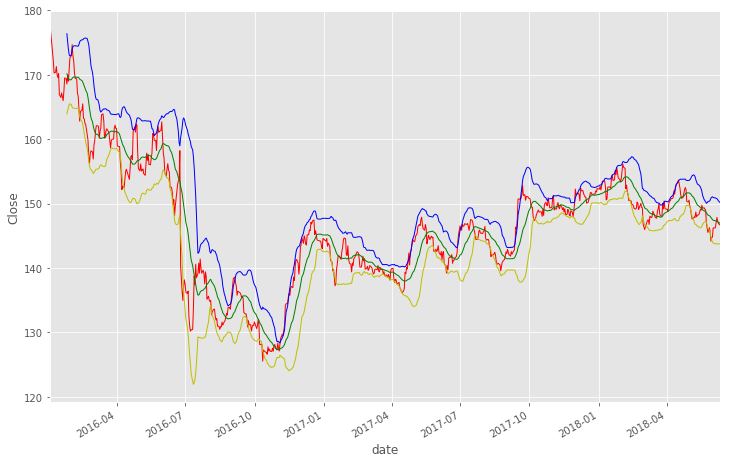

In [131]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(111,  xlabel = 'Date',ylabel='Close')
#days represents last # of dates to look at
days = 1000

data['askclose'].tail(days).plot(ax=ax1, color='r', lw=1)
data['upper_band'].tail(days).plot(ax=ax1, color = 'b', lw= 1)
data['mid_band'].tail(days).plot(ax=ax1, color = 'g', lw= 1)
data['lower_band'].tail(days).plot(ax=ax1, color = 'y', lw= 1)


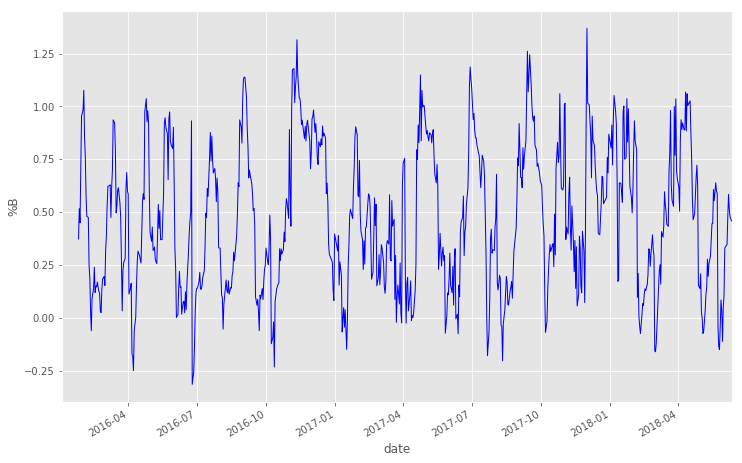

In [132]:
band_fig = plt.figure(figsize=(12,8))
ax2 = band_fig.add_subplot(111,  ylabel='%B')
data['bandwidth'].tail(days).plot(ax=ax2, color = 'b', lw= 1)

In [133]:
#For reference
#%B Above 1 = Price is Above the Upper Band
#%B Equal to 1 = Price is at the Upper Band
#%B Above .50 = Price is Above the Middle Line
#%B Below .50 = Price is Below the Middle Line
#%B Equal to 0 = Price is at the Lower Band
#%B Below 0 = Price is Below the Lower Band
#%B Above .80 = Price is Nearing the Upper Band
#%B Below .20 = Price is Nearing the Lower Band



In [134]:
#Define the strategy

#Price is nearing upper band
data['signal'] = np.where(data['bandwidth'] >= .8, 1, 0)
data['position'] = data['signal'].diff()


In [135]:
data

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,upper_band,mid_band,lower_band,bandwidth,signal,position
date,,,,,,,,,,,,,,,
2016-01-03 22:00:00,177.095,177.075,177.256,176.935,177.171,177.217,177.419,177.100,768,NaN,NaN,NaN,NaN,0,NaN
2016-01-04 22:00:00,177.075,175.671,177.359,174.946,177.217,175.889,177.393,174.979,459149,NaN,NaN,NaN,NaN,0,0.0
2016-01-05 22:00:00,175.671,174.655,176.154,174.079,175.889,174.780,176.182,174.102,400798,NaN,NaN,NaN,NaN,0,0.0
2016-01-06 22:00:00,174.655,173.303,174.909,173.085,174.780,173.367,174.950,173.118,509936,NaN,NaN,NaN,NaN,0,0.0
2016-01-07 22:00:00,173.303,171.902,173.748,170.743,173.367,172.094,173.791,170.775,562551,NaN,NaN,NaN,NaN,0,0.0
2016-01-08 22:00:00,171.902,170.103,173.371,170.103,172.094,170.305,173.399,170.282,540462,NaN,NaN,NaN,NaN,0,0.0
2016-01-10 22:00:00,170.103,170.211,170.335,170.121,170.305,170.389,170.462,170.242,660,NaN,NaN,NaN,NaN,0,0.0
2016-01-11 22:00:00,170.211,171.199,172.274,169.298,170.389,171.282,172.296,169.392,514611,NaN,NaN,NaN,NaN,0,0.0
2016-01-12 22:00:00,171.199,169.919,171.686,169.157,171.282,170.000,171.735,169.184,546538,NaN,NaN,NaN,NaN,0,0.0


In [136]:
#Create a backtest
buy_prices = []
sell_prices = []
profits = 0

for i, row in data.tail(days).iterrows():
    if row['position'] == 1:
        buy_prices.append(float(row['askopen']))
    if row['position'] == -1:
        sell_prices.append(float(row['askopen']))
    

In [137]:
buy_prices


[170.691,
 161.744,
 156.811,
 157.883,
 158.24,
 161.359,
 153.643,
 139.128,
 139.202,
 132.697,
 127.276,
 127.126,
 140.419,
 143.572,
 143.144,
 139.127,
 142.34,
 142.235,
 141.841,
 142.404,
 149.865,
 149.679,
 149.516,
 148.779,
 150.446,
 151.801,
 152.122,
 152.401,
 153.703,
 155.037,
 149.161,
 148.043,
 149.188,
 148.792]

In [138]:
sell_prices

[172.939,
 163.936,
 162.196,
 159.82,
 161.242,
 162.703,
 158.216,
 140.757,
 141.388,
 137.15,
 128.358,
 140.758,
 144.596,
 147.453,
 144.535,
 147.904,
 146.833,
 142.895,
 142.539,
 151.258,
 150.232,
 150.063,
 151.276,
 151.438,
 152.041,
 152.67,
 153.517,
 154.436,
 155.599,
 155.66,
 150.007,
 150.028,
 150.415,
 152.971]

In [139]:
pip_cost = .0911
lot_size = 10
for i in range(len(buy_prices)):
    profit = (sell_prices[i] - buy_prices[i]) * 100 * pip_cost * lot_size
    profits += profit
    print("The return for trade " + str(i + 1) + " is: " + str(int(profit)))
    
print("The return for the period is: " + str(int(profits)))

The return for trade 1 is: 204
The return for trade 2 is: 199
The return for trade 3 is: 490
The return for trade 4 is: 176
The return for trade 5 is: 273
The return for trade 6 is: 122
The return for trade 7 is: 416
The return for trade 8 is: 148
The return for trade 9 is: 199
The return for trade 10 is: 405
The return for trade 11 is: 98
The return for trade 12 is: 1241
The return for trade 13 is: 380
The return for trade 14 is: 353
The return for trade 15 is: 126
The return for trade 16 is: 799
The return for trade 17 is: 409
The return for trade 18 is: 60
The return for trade 19 is: 63
The return for trade 20 is: 806
The return for trade 21 is: 33
The return for trade 22 is: 34
The return for trade 23 is: 160
The return for trade 24 is: 242
The return for trade 25 is: 145
The return for trade 26 is: 79
The return for trade 27 is: 127
The return for trade 28 is: 185
The return for trade 29 is: 172
The return for trade 30 is: 56
The return for trade 31 is: 77
The return for trade 32 

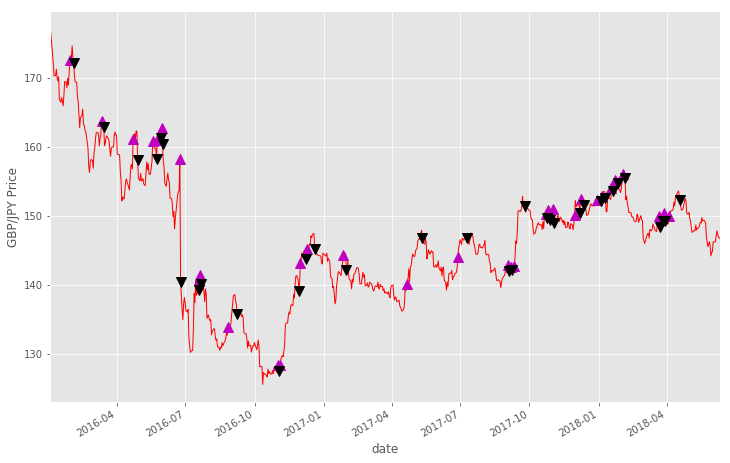

In [144]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111,  ylabel='GBP/JPY Price')

# Plotting market prices and moving averages
data['askclose'].plot(ax=ax1, color='r', lw=1.)

# Placing markers for our position entry
ax1.plot(data.loc[data.position == 1.0].index, 
         data.askclose[data.position == 1.0],
         '^', markersize=10, color='m')

# Placing markers for our position exit
ax1.plot(data.loc[data.position == -1.0].index, 
        data.askclose[data.position == -1.0],
         'v', markersize=10, color='k')

# Plotting our returns
#ax2 = ax1.twinx()
#ax2.grid(False)
#ax2.set_ylabel('Profits in $')
#ax2.plot(df['total'], color = 'green')

plt.show()

NameError: name 'df' is not defined

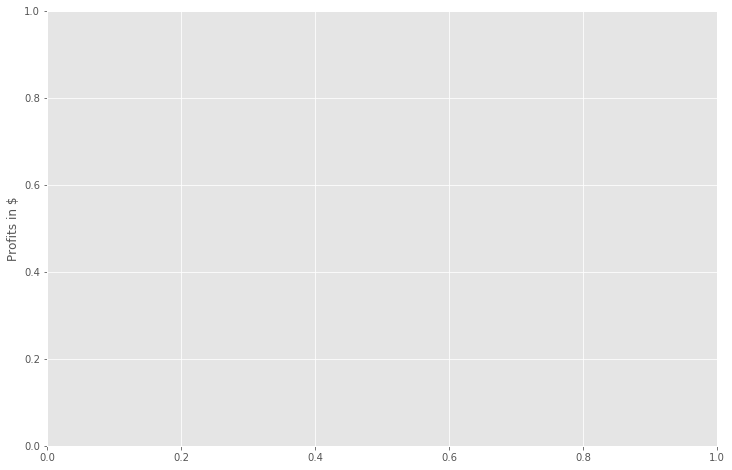